# DATA QUALITY

## IMPORT PACKAGES


In [2]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

import numpy as np
import pandas as pd
from janitor import clean_names
from paths import (
    TRANSFORMED_DATA_DIR,
    VALIDATION_DIR
)

# Quick autocompletion
%config IPCompleter.greedy=True

## IMPORT DATA

In [3]:
df = (pd.read_parquet(TRANSFORMED_DATA_DIR / 'work.parquet')
      .drop(columns=['id'])
)

df

,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
date,,,,,,,,,,,,,,,,,
2013-01-01,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,d_704,0,11249,Tuesday,4,1,2013,NewYear,National,None,None,1.25
2013-01-01,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,d_704,0,11249,Tuesday,4,1,2013,NewYear,National,None,None,4.98
2013-01-01,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,d_704,20,11249,Tuesday,4,1,2013,NewYear,National,None,None,4.28
2013-01-01,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,d_704,34,11249,Tuesday,4,1,2013,NewYear,National,None,None,1.48
2013-01-01,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,d_704,0,11249,Tuesday,4,1,2013,NewYear,National,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,FOODS_3_329,FOODS_3,FOODS,CA_4,CA,d_1767,5,11544,Monday,3,11,2015,None,None,None,None,2.98
2015-11-30,FOODS_3_555,FOODS_3,FOODS,CA_4,CA,d_1767,4,11544,Monday,3,11,2015,None,None,None,None,1.68
2015-11-30,FOODS_3_586,FOODS_3,FOODS,CA_4,CA,d_1767,9,11544,Monday,3,11,2015,None,None,None,None,1.68


## GENERAL VIEWING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       21280 non-null  object 
 1   dept_id       21280 non-null  object 
 2   cat_id        21280 non-null  object 
 3   store_id      21280 non-null  object 
 4   state_id      21280 non-null  object 
 5   d             21280 non-null  object 
 6   sales         21280 non-null  int64  
 7   wm_yr_wk      21280 non-null  int64  
 8   weekday       21280 non-null  object 
 9   wday          21280 non-null  int64  
 10  month         21280 non-null  int64  
 11  year          21280 non-null  int64  
 12  event_name_1  1700 non-null   object 
 13  event_type_1  1700 non-null   object 
 14  event_name_2  60 non-null     object 
 15  event_type_2  60 non-null     object 
 16  sell_price    21209 non-null  float64
dtypes: float64(1), int64(5), object(11)
memory usage: 2.

## DATA TYPES

In [5]:
df.dtypes

item_id          object
dept_id          object
cat_id           object
store_id         object
state_id         object
d                object
sales             int64
wm_yr_wk          int64
weekday          object
wday              int64
month             int64
year              int64
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
sell_price      float64
dtype: object

Conclusion: 

* year, month, and wday should be categorical

### Correction

In [6]:
df = df.astype({'year':'O',
               'month': 'O',
               'wday': 'O'})

df.dtypes

item_id          object
dept_id          object
cat_id           object
store_id         object
state_id         object
d                object
sales             int64
wm_yr_wk          int64
weekday          object
wday             object
month            object
year             object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
sell_price      float64
dtype: object

## UNIQUE VALUES

In [7]:
df.nunique().sort_values()

dept_id            1
cat_id             1
state_id           1
store_id           2
event_type_2       2
year               3
event_name_2       3
event_type_1       4
weekday            7
wday               7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         153
sales            301
d               1064
dtype: int64

### Correction

In [8]:
df.drop(columns = ['state_id','cat_id','dept_id'], inplace = True)

## DUPLICATES

In [9]:
df.duplicated().sum()

np.int64(0)

## SPLIT NUMERICAL AND CATEGORICAL

### Categorical

In [10]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numeric

In [11]:
num = df.select_dtypes(include='number').copy()

## CATEGORICAL MANAGEMENT

### Nulls

In [12]:
cat.isna().sum().sort_values(ascending = False)

event_name_2    21220
event_type_2    21220
event_name_1    19580
event_type_1    19580
d                   0
item_id             0
store_id            0
year                0
month               0
wday                0
weekday             0
dtype: int64

In [13]:
cat.event_name_1.value_counts(dropna=False)

event_name_1
None                   19580
NewYear                   60
OrthodoxChristmas         60
MartinLutherKingDay       60
SuperBowl                 60
LentStart                 60
ValentinesDay             60
PresidentsDay             60
LentWeek2                 60
Purim End                 60
StPatricksDay             60
Easter                    60
Pesach End                60
Mother's day              60
MemorialDay               60
Thanksgiving              60
NBAFinalsStart            60
NBAFinalsEnd              60
IndependenceDay           60
Eid al-Fitr               60
Ramadan starts            60
LaborDay                  60
ColumbusDay               60
Halloween                 60
EidAlAdha                 60
VeteransDay               60
OrthodoxEaster            40
Father's day              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: count, dtype: int64

In [14]:
cat.event_name_2.value_counts(dropna=False)

event_name_2
None              21220
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: count, dtype: int64

In [15]:
cat.event_type_1.value_counts(dropna=False)

event_type_1
None         19580
National       580
Religious      560
Cultural       380
Sporting       180
Name: count, dtype: int64

In [16]:
cat.event_type_2.value_counts(dropna=False)

event_type_2
None         21220
Cultural        40
Religious       20
Name: count, dtype: int64

In [17]:
pd.crosstab(index=cat['event_name_1'], columns=cat['event_name_2'])

event_name_2,Cinco De Mayo,Father's day,OrthodoxEaster
event_name_1,,,
Easter,0,0,20
NBAFinalsEnd,0,20,0
OrthodoxEaster,20,0,0


Conclusions:

* event_name_2 has events that are already included in event_name_1
* but then when crossing them they don't match
* as we don't know why we are going to delete event_name_2 and also event_type_2
* in terms of the nulls of event_name_1 and event_type_1 it seems clear that they are "None" days, so we will impute them as such


#### Correction

##### Eliminate variable

In [18]:
cat.drop(columns = ['event_name_2','event_type_2'],inplace = True)

##### Impute for a value

###### Variables to impute

In [19]:
var_impute_value = ['event_name_1','event_type_1']

###### Value to impute

In [20]:
value = 'None'

###### Impute

In [21]:
cat[var_impute_value] = cat[var_impute_value].fillna(value)

Check

In [22]:
cat.isna().sum().sort_values(ascending = False)

item_id         0
store_id        0
d               0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
dtype: int64

### Outliers

#### Less frequent categories

##### Identification

In [23]:
for variable in cat:
    print(variable + '\n')
    print(cat[variable].value_counts(dropna = False))
    print('\n\n')

item_id

item_id
FOODS_3_090    2128
FOODS_3_120    2128
FOODS_3_202    2128
FOODS_3_252    2128
FOODS_3_288    2128
FOODS_3_329    2128
FOODS_3_555    2128
FOODS_3_586    2128
FOODS_3_587    2128
FOODS_3_714    2128
Name: count, dtype: int64



store_id

store_id
CA_3    10640
CA_4    10640
Name: count, dtype: int64



d

d
d_1767    20
d_704     20
d_705     20
d_706     20
d_707     20
          ..
d_715     20
d_716     20
d_717     20
d_718     20
d_719     20
Name: count, Length: 1064, dtype: int64



weekday

weekday
Tuesday      3040
Wednesday    3040
Thursday     3040
Friday       3040
Saturday     3040
Sunday       3040
Monday       3040
Name: count, dtype: int64



wday

wday
4    3040
5    3040
6    3040
7    3040
1    3040
2    3040
3    3040
Name: count, dtype: int64



month

month
1     1860
3     1860
7     1860
5     1860
8     1860
10    1860
6     1800
4     1800
11    1800
9     1800
2     1680
12    1240
Name: count, dtype: int64



year

year
2013    7300
2014   

Conclusion:

* There are not less frequent categories
* There are months with less records, this may be because they are the months with less than 31 days
* 2015 has less records, are they the validation or are there more?

Let's check it.

In [24]:
df.groupby('year').d.nunique()

year
2013    365
2014    365
2015    334
Name: d, dtype: int64

There are 31 days in 2015, so there are some months with less records.

Let's check which ones.

In [25]:
pd.date_range(start = '2015-01-01', end = '2015-12-31' ).difference(df.loc['2015'].index)

DatetimeIndex(['2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12',
               '2015-12-13', '2015-12-14', '2015-12-15', '2015-12-16',
               '2015-12-17', '2015-12-18', '2015-12-19', '2015-12-20',
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='D')

It's clear that they are the dates from the validation set, so everything is correct.

## NUMERICAL MANAGEMENT

### Statistics

In [26]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sell_price,21209.0,2.397254,1.237024,1.0,1.5,1.58,2.98,4.98


### Nulls

### Identification

In [27]:
num.isna().sum().sort_values(ascending = False)

sell_price    71
sales          0
wm_yr_wk       0
dtype: int64

sell_price is a relevant variable, let's see if we can find any pattern.

In [28]:
#Grouping by item_id
df.groupby('item_id').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

/var/folders/b5/qz8x1m_510q3zk9lktbr3gx40000gn/T/ipykernel_15619/4110277298.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('item_id').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)


item_id
FOODS_3_288    71
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
dtype: int64

In [30]:
#Grouping by sales
df.groupby('sales').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

/var/folders/b5/qz8x1m_510q3zk9lktbr3gx40000gn/T/ipykernel_15619/3642648053.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('sales').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)


sales
0     71
4      0
5      0
6      0
7      0
      ..
40     0
41     0
42     0
43     0
2      0
Length: 301, dtype: int64

---

It is clear that they are from the validation set, so everything is correct.

---

It only happens with one product and only on the days when there are no sales.

Clearly, the reason is that if there are no sales, the price is not assigned.

We need to correct this, as it is artificial:

* The product has a price even if there were no sales that day.

What would make more sense is to impute those nulls with the first valid previous value SEGMENTED BY PRODUCT.

But it could happen that the first day of a product had zero sales, which would carry the nulls forward without solving the problem.

So we are going to impute using the most frequent price of EACH PRODUCT (the mode).

This adds complexity, as we need the product, which we do not have in num.

So we need to temporarily include it and then remove it.

##### Add the product

In [31]:
num = pd.concat([num,cat.item_id], axis = 1)
num

,sales,wm_yr_wk,sell_price,item_id
date,,,,
2013-01-01,0,11249,1.25,FOODS_3_090
2013-01-01,0,11249,4.98,FOODS_3_120
2013-01-01,20,11249,4.28,FOODS_3_202
2013-01-01,34,11249,1.48,FOODS_3_252
2013-01-01,0,11249,NaN,FOODS_3_288
...,...,...,...,...
2015-11-30,5,11544,2.98,FOODS_3_329
2015-11-30,4,11544,1.68,FOODS_3_555
2015-11-30,9,11544,1.68,FOODS_3_586


#### Correct the nulls of sell_price

##### Calculate the most frequent price by product and impute

In [32]:
def impute_mode(records):
    # Calculate the mode of the price for that product
    mode = records.sell_price.mode()[0]
    # Impute the nulls
    records.loc[records.sell_price.isna(), 'sell_price'] = mode
    # Return all records of the product
    return(records)

num = num.groupby('item_id', group_keys=False).apply(impute_mode)

/var/folders/b5/qz8x1m_510q3zk9lktbr3gx40000gn/T/ipykernel_15619/286103201.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  num = num.groupby('item_id', group_keys=False).apply(impute_mode)


To check that the imputation has been done by product, we can review the different price values in each product and see that there is no large jump, for example a jump from 3 to 10.

In [33]:
num.groupby('item_id').sell_price.value_counts()

item_id      sell_price
FOODS_3_090  1.48           658
             1.38           546
             1.44           504
             1.00           280
             1.50            90
             1.25            50
FOODS_3_120  4.98          2128
FOODS_3_202  4.58           727
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1182
             1.48           946
FOODS_3_288  1.50          2100
             1.25            21
             1.18             7
FOODS_3_329  2.98          2079
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           979
FOODS_3_586  1.58          1149
             1.68           979
FOODS_3_587  2.48          1644
             2.68           421
             1.98            63
FOODS_3_714  1.5

##### Eliminate the product

In [34]:
num.drop(columns = 'item_id',inplace=True)

In [35]:
num.head()

,sales,wm_yr_wk,sell_price
date,,,
2013-01-01,0,11249,1.25
2013-01-01,33,11249,1.25
2013-01-01,0,11249,4.98
2013-01-01,0,11249,4.98
2013-01-01,20,11249,4.28


### Outliers

#### Using standard deviation

##### Identification

###### Define the number of standard deviations

In [41]:
num_std_dev = 4

###### Function that returns the indices of the outliers

In [42]:
def outliers_std_dev(variable, num_std_dev=4):
    # Remove null values for now
    variable = variable.dropna()
    # Calculate the limits
    mean = np.mean(variable)
    sd = np.std(variable)
    threshold = sd * num_std_dev
    lower_limit = mean - threshold
    upper_limit = mean + threshold
    # Find the indices of those outside the limits
    indices = [index for index, value in variable.items() if value < lower_limit or value > upper_limit]
    return(indices)

###### Function that counts the number of outliers

In [43]:
def count_outliers(df, variable, num_std_dev=4):
    outliers = outliers_std_dev(df[variable], num_std_dev)
    return(df.loc[outliers, variable].value_counts())

###### Variables to apply

In [44]:
var_outliers_std_dev = ['sales','sell_price']

###### Aplicar

In [45]:
for variable in var_outliers_std_dev:
    print('\n' + variable + ':\n')
    print(count_outliers(num, variable, num_std_dev))


sales:

sales
0      518
1      103
5      100
10      95
7       92
      ... 
158      1
139      1
103      1
107      1
323      1
Name: count, Length: 247, dtype: int64

sell_price:

Series([], Name: count, dtype: int64)


Might be upper outliers.

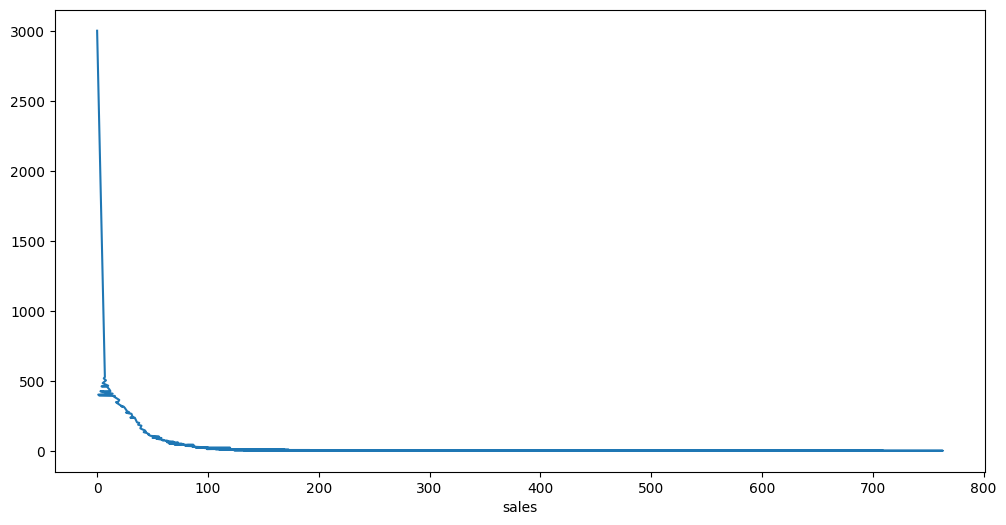

In [46]:
num.sales.value_counts().plot(figsize = (12,6));

Conclusion:

* It is a clear example of a long tail, which is very common in retail
* Better not do anything about outliers for now, we will see it better in EDA.

### Long Tail in Retail Sales

A long tail in retail sales is common due to several factors:

1. **Diverse Product Range**: Retailers offer a wide variety of products, including niche items that appeal to specific customer segments.

2. **Consumer Behavior**: Varied consumer preferences lead to demand for unique or specialized items, contributing to the long tail.

3. **Online Retailing**: E-commerce allows retailers to stock a vast inventory without physical space constraints, enabling sales of less popular items.

4. **Search and Discovery**: Algorithms on online platforms help customers discover niche products, increasing their sales.

5. **Seasonality and Trends**: Certain products may experience sales spikes during specific seasons or events, adding to the long tail.

6. **Inventory Management**: Data analytics help retailers optimize inventory by balancing high-demand and low-demand items.

7. **Brand Loyalty and Niche Markets**: Loyal customers may continue purchasing less popular items, benefiting retailers catering to niche markets.

8. **Price Sensitivity**: Consumers may opt for cheaper alternatives, contributing to sales in the long tail.

Understanding the long tail allows retailers to optimize inventory and enhance customer satisfaction, driving sales across a broader range of products. 

## SAVE DATASETS AFTER DATA QUALITY

Save changes in parquet files

In [48]:
# Define the paths for saving Parquet files
path_work = TRANSFORMED_DATA_DIR / 'work_result_quality.parquet'
path_cat = TRANSFORMED_DATA_DIR / 'cat_result_quality.parquet'
path_num = TRANSFORMED_DATA_DIR / 'num_result_quality.parquet'

# Save the DataFrames as Parquet files
df.to_parquet(path_work)
cat.to_parquet(path_cat)
num.to_parquet(path_num)

print("Datasets saved successfully in Parquet format.")

Datasets saved successfully in Parquet format.


In [1]:
cat

^C


In [51]:
num

,sales,wm_yr_wk,sell_price
date,,,
2013-01-01,0,11249,1.25
2013-01-01,33,11249,1.25
2013-01-01,0,11249,4.98
2013-01-01,0,11249,4.98
2013-01-01,20,11249,4.28
...,...,...,...
2015-11-30,9,11544,1.68
2015-11-30,26,11544,2.48
2015-11-30,13,11544,2.48
